In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn import preprocessing

In [2]:
tabela = pd.read_csv('Tabela_Clubes.csv')

In [3]:
tabela.head()

,Ano,Pos.,Clubes,Vitorias,Derrotas,Empates,GolsF/S,Saldo,Qtd_Jogadores,Idade_Media,Estrangeiros,Valor_total,Media_Valor,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,2017,18,America-MG,10,10,18,30:47,-17,51,"24,8",0,27350000,536000,NaN,NaN,NaN,NaN
1,2017,7,Athletico-PR,16,9,13,54:37,17,52,24,3,37650000,724000,NaN,NaN,NaN,NaN
2,2017,6,Atletico-MG,17,8,13,56:43,13,50,"23,4",6,61350000,1230000,NaN,NaN,NaN,NaN
3,2017,11,Bahia,12,12,14,39:41,-2,48,"23,2",2,34900000,727000,NaN,NaN,NaN,NaN
4,2017,9,Botafogo,13,12,13,38:46,-8,45,"23,1",4,25550000,568000,NaN,NaN,NaN,NaN


In [4]:
tabela.drop(['Unnamed: 16', 'Unnamed: 15', 'Unnamed: 14', 'Unnamed: 13', 'Saldo', 'GolsF/S', 'Derrotas'], inplace=True, axis=1)

In [5]:
tabela.rename(columns={"Pos.": "Posicao"}, inplace=True)

In [6]:
tabela['Pontos'] = (tabela['Vitorias']*3) + (tabela['Empates'])

In [7]:
tabela.head()

,Ano,Posicao,Clubes,Vitorias,Empates,Qtd_Jogadores,Idade_Media,Estrangeiros,Valor_total,Media_Valor,Pontos
0,2017,18,America-MG,10,18,51,"24,8",0,27350000,536000,48
1,2017,7,Athletico-PR,16,13,52,24,3,37650000,724000,61
2,2017,6,Atletico-MG,17,13,50,"23,4",6,61350000,1230000,64
3,2017,11,Bahia,12,14,48,"23,2",2,34900000,727000,50
4,2017,9,Botafogo,13,13,45,"23,1",4,25550000,568000,52


In [8]:
primeiros_colocados = tabela.query('Posicao == 1')

In [9]:
primeiros_colocados 

,Ano,Posicao,Clubes,Vitorias,Empates,Qtd_Jogadores,Idade_Media,Estrangeiros,Valor_total,Media_Valor,Pontos
13,2017,1,Palmeiras,23,4,48,"24,8",4,88330000,1840000,73
27,2016,1,Corinthians,21,8,41,"23,4",3,49500000,1210000,71
53,2015,1,Palmeiras,24,6,38,"25,9",4,69950000,1840000,78
64,2014,1,Corinthians,24,5,36,"24,8",4,52850000,1470000,77
88,2013,1,Cruzeiro,24,6,32,"25,7",4,41950000,1310000,78
107,2012,1,Cruzeiro,23,8,44,"24,4",1,15100000,343000,77
129,2011,1,Fluminense,22,5,40,"22,8",4,44200000,1110000,71
148,2010,1,Corinthians,21,9,51,"23,6",4,69700000,1370000,72
169,2009,1,Fluminense,20,7,50,"23,5",4,42950000,859000,67
187,2008,1,Flamengo,19,9,35,"23,3",4,50400000,1440000,66


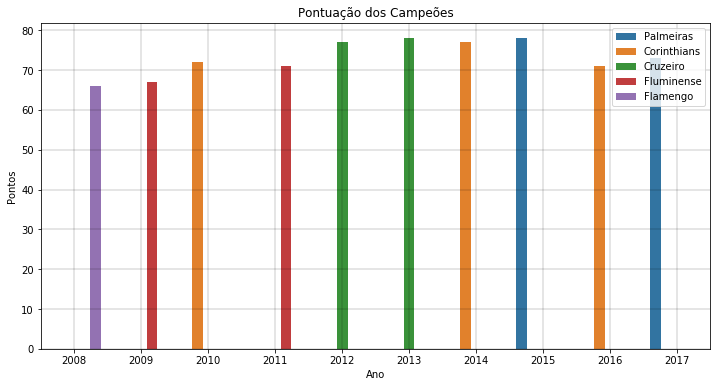

In [10]:
plt.figure(figsize=(12, 6))
pontos_campeoes = sns.barplot(x='Ano', y='Pontos', hue='Clubes', data=primeiros_colocados)
pontos_campeoes.set_title("Pontuação dos Campeões")
plt.grid(color='black', linestyle='-', linewidth=0.2)
plt.legend(loc=0)

In [11]:
br2017 = tabela.query('Ano == 2017')

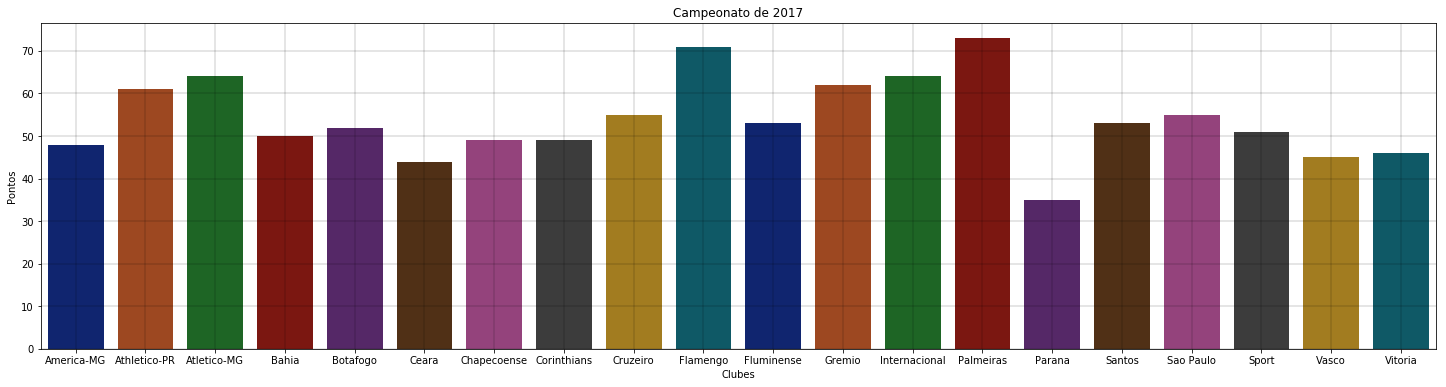

In [12]:
plt.figure(figsize=(25, 6))
campeonato2017 = sns.barplot(x='Clubes', y='Pontos', data=br2017, palette="dark")
campeonato2017.set_title("Campeonato de 2017")
plt.grid(color='black', linestyle='-', linewidth=0.2)

In [13]:
tabela.drop(['Empates'], inplace=True, axis=1)

In [14]:
tabela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
Ano              200 non-null int64
Posicao          200 non-null int64
Clubes           200 non-null object
Vitorias         200 non-null int64
Qtd_Jogadores    200 non-null int64
Idade_Media      200 non-null object
Estrangeiros     200 non-null int64
Valor_total      200 non-null int64
Media_Valor      200 non-null int64
Pontos           200 non-null int64
dtypes: int64(8), object(2)
memory usage: 15.7+ KB


In [15]:
tabela.corr()

,Ano,Posicao,Vitorias,Qtd_Jogadores,Estrangeiros,Valor_total,Media_Valor,Pontos
Ano,1.000000,0.000000,0.031009,0.126145,0.278939,0.126457,0.098256,0.055472
Posicao,0.000000,1.000000,-0.941322,0.063936,-0.241929,-0.447804,-0.500739,-0.853539
Vitorias,0.031009,-0.941322,1.000000,-0.121795,0.229198,0.400725,0.476106,0.960501
Qtd_Jogadores,0.126145,0.063936,-0.121795,1.000000,0.324823,0.305617,-0.034441,-0.141018
Estrangeiros,0.278939,-0.241929,0.229198,0.324823,1.000000,0.529249,0.429779,0.231998
Valor_total,0.126457,-0.447804,0.400725,0.305617,0.529249,1.000000,0.919658,0.359874
Media_Valor,0.098256,-0.500739,0.476106,-0.034441,0.429779,0.919658,1.000000,0.438277
Pontos,0.055472,-0.853539,0.960501,-0.141018,0.231998,0.359874,0.438277,1.000000


In [16]:
tabela.Idade_Media = tabela.Idade_Media.apply(lambda x: x.replace(',', '.'))

In [17]:
tabela.Idade_Media = tabela.Idade_Media.astype(float)

In [18]:
tabela.corr()

,Ano,Posicao,Vitorias,Qtd_Jogadores,Idade_Media,Estrangeiros,Valor_total,Media_Valor,Pontos
Ano,1.000000,0.000000,0.031009,0.126145,0.146387,0.278939,0.126457,0.098256,0.055472
Posicao,0.000000,1.000000,-0.941322,0.063936,0.110036,-0.241929,-0.447804,-0.500739,-0.853539
Vitorias,0.031009,-0.941322,1.000000,-0.121795,-0.045361,0.229198,0.400725,0.476106,0.960501
Qtd_Jogadores,0.126145,0.063936,-0.121795,1.000000,-0.181798,0.324823,0.305617,-0.034441,-0.141018
Idade_Media,0.146387,0.110036,-0.045361,-0.181798,1.000000,-0.132706,-0.077874,0.002201,-0.015219
Estrangeiros,0.278939,-0.241929,0.229198,0.324823,-0.132706,1.000000,0.529249,0.429779,0.231998
Valor_total,0.126457,-0.447804,0.400725,0.305617,-0.077874,0.529249,1.000000,0.919658,0.359874
Media_Valor,0.098256,-0.500739,0.476106,-0.034441,0.002201,0.429779,0.919658,1.000000,0.438277
Pontos,0.055472,-0.853539,0.960501,-0.141018,-0.015219,0.231998,0.359874,0.438277,1.000000


Text(0, 0.5, 'Posição')

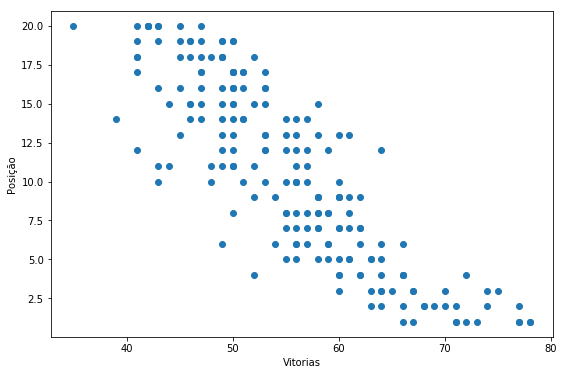

In [19]:
figure = plt.figure(figsize=(9,6))
plt.scatter(tabela['Pontos'],tabela['Posicao'])
plt.xlabel('Vitorias')
plt.ylabel('Posição')

In [20]:
tabela.drop(['Clubes','Ano'], axis=1, inplace=True)

In [21]:
tabela.drop('Qtd_Jogadores', axis=1, inplace=True)

In [22]:
tabela.drop('Estrangeiros', axis=1, inplace=True)

In [23]:
tabela.drop('Idade_Media', axis=1, inplace=True)

In [24]:
tabela.drop(['Media_Valor','Valor_total'], axis=1, inplace=True)

In [25]:
tabela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
Posicao     200 non-null int64
Vitorias    200 non-null int64
Pontos      200 non-null int64
dtypes: int64(3)
memory usage: 4.8 KB


In [26]:
X = tabela.drop('Posicao', axis=1)
y = tabela['Posicao'] 

In [27]:
SEED = 62

In [28]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.25, random_state = SEED)

In [29]:
modelo = LinearRegression()
modelo.fit(X_treino, y_treino)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
print(modelo.coef_)
print(modelo.intercept_)

[-2.3996418   0.47727393]
17.44617856293267


In [31]:
previsoes = modelo.predict(X_teste)

In [32]:
r2_score(y_teste, previsoes)*100

91.40766551599371